In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: nicer style
sns.set(style="whitegrid")


In [2]:

# ============================
# 1. LOAD DATA
# ============================
df = pd.read_csv("new_health_dataset.csv")

print("Shape:", df.shape)
print(df.head())

Shape: (10000, 10)
   age  gender   bmi condition_type  severity_score  rest_hours_per_day  \
0   18    Male  19.7      Infection            7.72                 5.1   
1   34   Other  21.6          Fever            4.13                 7.4   
2   77  Female  21.7            Flu            4.02                 6.7   
3   89    Male  31.1          Cough            3.50                 4.3   
4   58    Male  21.1          Cough            4.54                 8.5   

   medication_adherence  hospital_visits smoking_status  recovery_days  
0                  0.74                1     Non-Smoker             18  
1                  0.90                1        Regular              7  
2                  0.85                2     Non-Smoker             22  
3                  0.67                2     Non-Smoker             27  
4                  0.48                1     Non-Smoker             10  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   10000 non-null  int64  
 1   gender                10000 non-null  object 
 2   bmi                   10000 non-null  float64
 3   condition_type        10000 non-null  object 
 4   severity_score        10000 non-null  float64
 5   rest_hours_per_day    10000 non-null  float64
 6   medication_adherence  10000 non-null  float64
 7   hospital_visits       10000 non-null  int64  
 8   smoking_status        10000 non-null  object 
 9   recovery_days         10000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 781.4+ KB
None


In [4]:
print(df.describe(include="all"))

                 age  gender           bmi condition_type  severity_score  \
count   10000.000000   10000  10000.000000          10000    10000.000000   
unique           NaN       3           NaN              6             NaN   
top              NaN  Female           NaN          Fever             NaN   
freq             NaN    4805           NaN           1685             NaN   
mean       49.880000     NaN     25.030170            NaN        5.493713   
std        23.075191     NaN      4.422766            NaN        2.585282   
min        10.000000     NaN     15.000000            NaN        1.000000   
25%        30.000000     NaN     22.000000            NaN        3.230000   
50%        50.000000     NaN     25.000000            NaN        5.500000   
75%        70.000000     NaN     28.000000            NaN        7.730000   
max        89.000000     NaN     40.000000            NaN       10.000000   

        rest_hours_per_day  medication_adherence  hospital_visits  \
count 

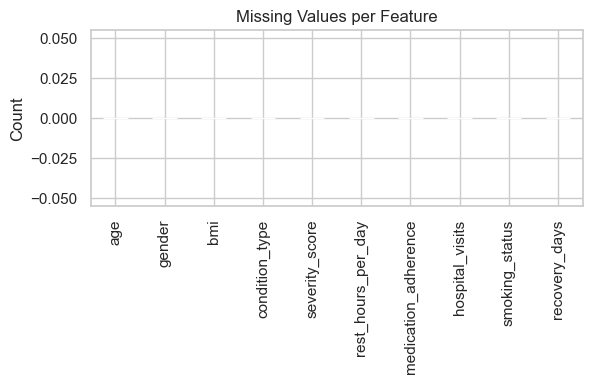

In [5]:
# ============================
# 2. MISSING VALUES
# ============================
plt.figure(figsize=(6,4))
df.isnull().sum().plot(kind="bar")
plt.title("Missing Values per Feature")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

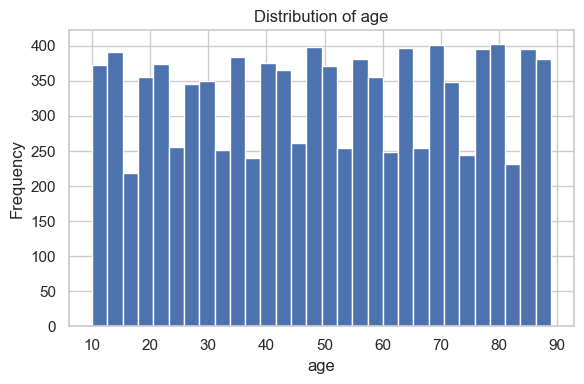

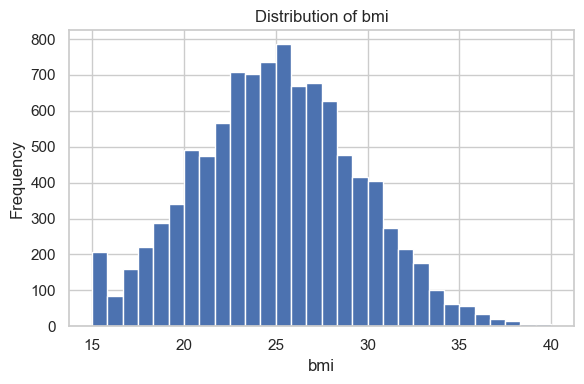

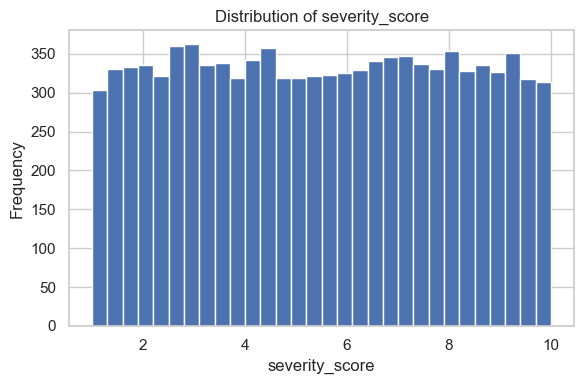

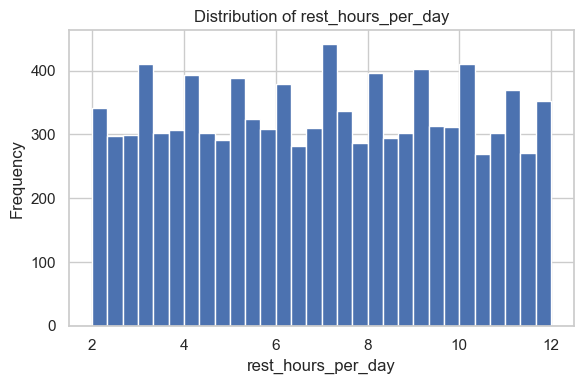

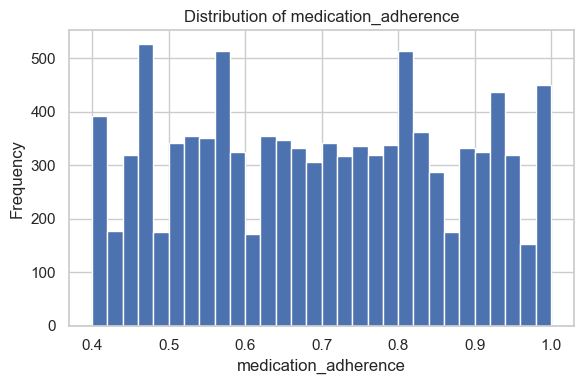

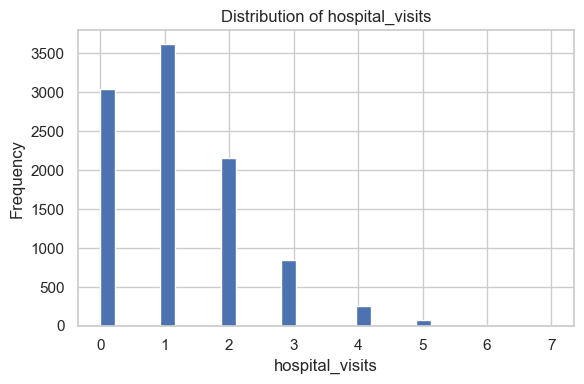

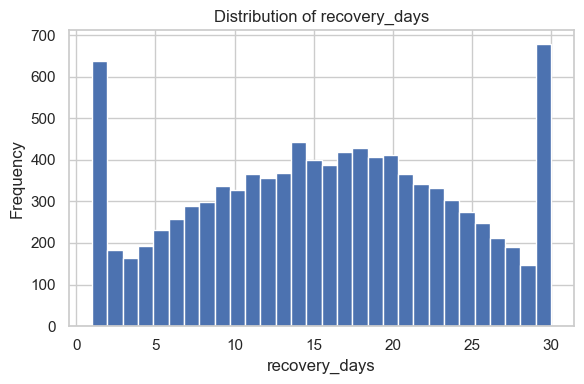

In [6]:
# ============================
# 3. DISTRIBUTIONS (NUMERIC)
# ============================
numeric_cols = ["age", "bmi", "severity_score",
                "rest_hours_per_day", "medication_adherence",
                "hospital_visits", "recovery_days"]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

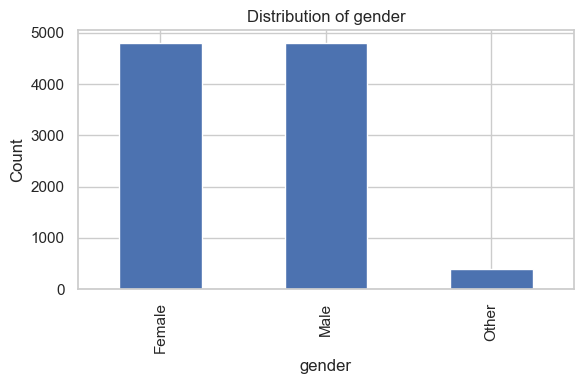

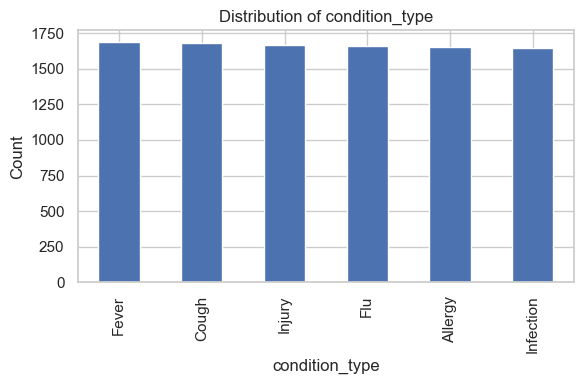

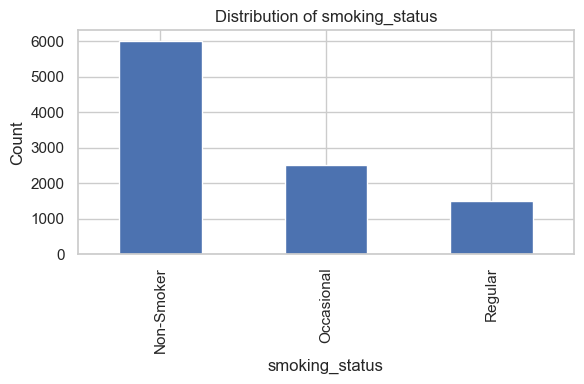

In [7]:
# ============================
# 4. CATEGORICAL DISTRIBUTIONS
# ============================
cat_cols = ["gender", "condition_type", "smoking_status"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

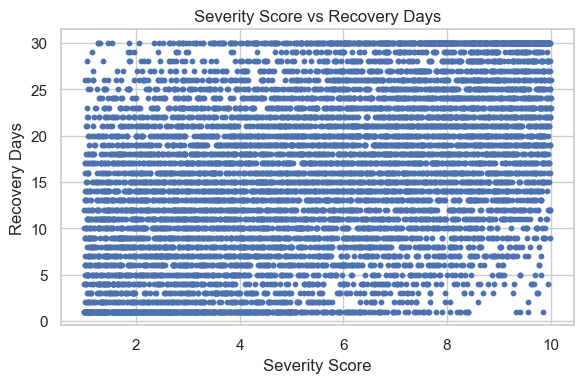

In [8]:

# ============================
# 5. RELATIONSHIPS WITH RECOVERY DAYS
# ============================

# Severity vs Recovery
plt.figure(figsize=(6,4))
plt.scatter(df["severity_score"], df["recovery_days"], s=10)
plt.title("Severity Score vs Recovery Days")
plt.xlabel("Severity Score")
plt.ylabel("Recovery Days")
plt.tight_layout()
plt.show()


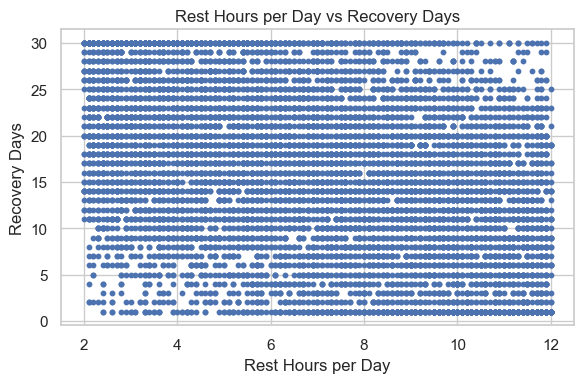

In [9]:
# Rest hours vs Recovery
plt.figure(figsize=(6,4))
plt.scatter(df["rest_hours_per_day"], df["recovery_days"], s=10)
plt.title("Rest Hours per Day vs Recovery Days")
plt.xlabel("Rest Hours per Day")
plt.ylabel("Recovery Days")
plt.tight_layout()
plt.show()

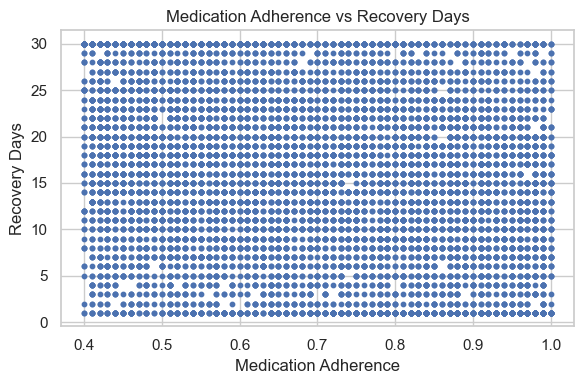

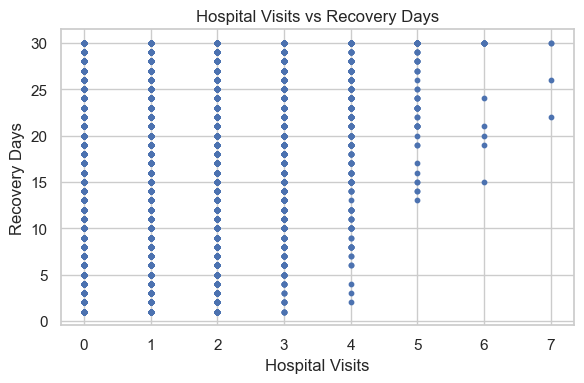

In [10]:
# Medication adherence vs Recovery
plt.figure(figsize=(6,4))
plt.scatter(df["medication_adherence"], df["recovery_days"], s=10)
plt.title("Medication Adherence vs Recovery Days")
plt.xlabel("Medication Adherence")
plt.ylabel("Recovery Days")
plt.tight_layout()
plt.show()

# Hospital visits vs Recovery
plt.figure(figsize=(6,4))
plt.scatter(df["hospital_visits"], df["recovery_days"], s=10)
plt.title("Hospital Visits vs Recovery Days")
plt.xlabel("Hospital Visits")
plt.ylabel("Recovery Days")
plt.tight_layout()
plt.show()

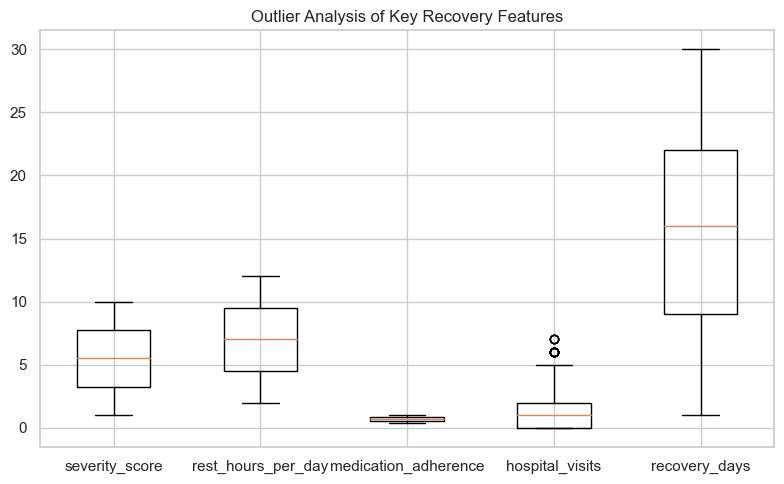

In [11]:
# ============================
# 6. BOX PLOTS (OUTLIER ANALYSIS)
# ============================
features_for_box = ["severity_score", "rest_hours_per_day",
                    "medication_adherence", "hospital_visits",
                    "recovery_days"]

plt.figure(figsize=(8,5))
plt.boxplot([df[f] for f in features_for_box], labels=features_for_box)
plt.title("Outlier Analysis of Key Recovery Features")
plt.tight_layout()
plt.show()

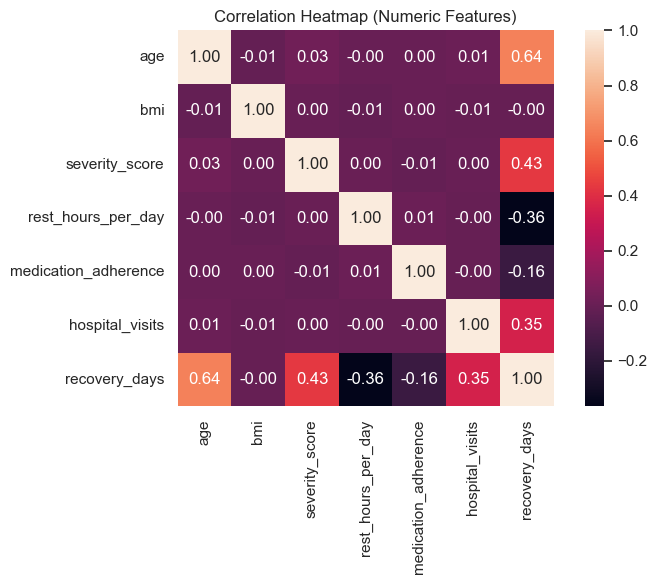

In [12]:
# ============================
# 7. CORRELATION HEATMAP
# ============================
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

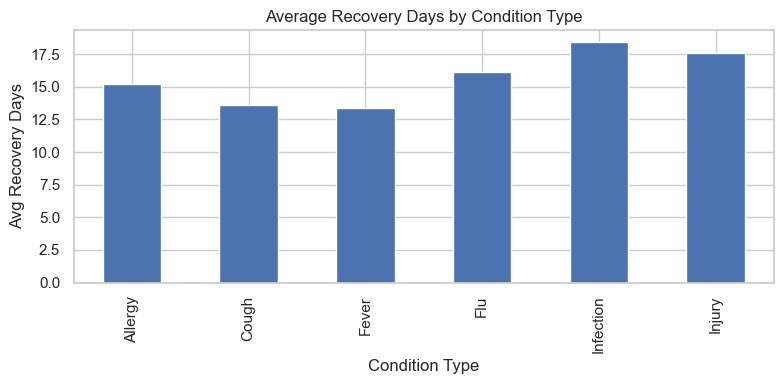

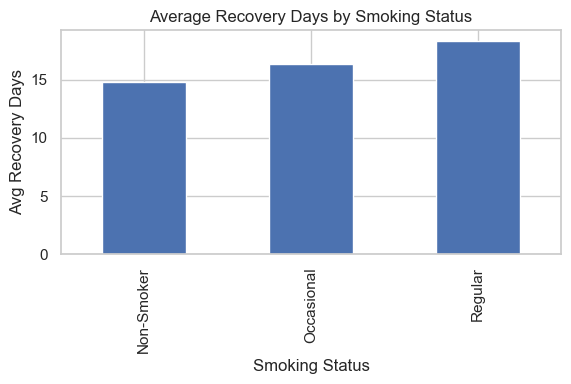

In [13]:
# ============================
# 8. RECOVERY BY CONDITION & SMOKING STATUS
# ============================

plt.figure(figsize=(8,4))
df.groupby("condition_type")["recovery_days"].mean().plot(kind="bar")
plt.title("Average Recovery Days by Condition Type")
plt.xlabel("Condition Type")
plt.ylabel("Avg Recovery Days")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
df.groupby("smoking_status")["recovery_days"].mean().plot(kind="bar")
plt.title("Average Recovery Days by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Avg Recovery Days")
plt.tight_layout()
plt.show()
